In [15]:
# All imports are here
%matplotlib inline
import numpy as np
import scipy.stats as sts
from typing import Dict, Tuple
import matplotlib.pyplot as plt


In [8]:
def pearson_coeff(x: np.array, y: np.array) -> float:
    """
    This function calculates the pearson coefficient for a sample dataset
    :param x: numpy array of x values
    :param y: numpy array of y values
    :return: pearson coefficient
    """
    covar = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    varx = np.sum((x - np.mean(x)) ** 2)
    vary = np.sum((y - np.mean(y)) ** 2)
    return covar / np.sqrt(varx * vary)


In [20]:
def linear_regression_least_squared(x: np.array, y:np.array) -> Dict[str, float]:
  """
  This function calculates the linear regression of the given data
  :param x: 1D numpy array of data
  :param y: 1D numpy array of data
  :return: dictionary of the linear regression parameters
  """
  # least squared estimate of the slope
  slope = np.sum((x - np.mean(x))*y) / np.sum((x - np.mean(x)) ** 2)

  # least squared estimate of intercept
  intercept = np.mean(y) - slope * np.mean(x)

  # predicted data
  predicted = intercept + np.multiply(x, slope)

  degrees_of_freedom = len(y) - 2

  # mean squared error of residuals
  residual = (y - predicted) ** 2
  mean_squared_error = np.sum(residual) / degrees_of_freedom

  # variance of slope
  variance_slope = mean_squared_error / np.sum((x - np.mean(x)) ** 2)

  # null hypothesis: slope = 0
  t_statistic = slope / np.sqrt(variance_slope)

  # p-value
  p_value = 2 * (sts.t.cdf(-1*np.abs(t_statistic), df=degrees_of_freedom))

  return {
    "slope": slope,
    "intercept": intercept,
    "residual": residual,
    "mean_squared_error": mean_squared_error,
    "variance_slope": variance_slope,
    "degrees_of_freedom": degrees_of_freedom,
    "t_statistic": t_statistic,
    "p_value": p_value
    }


### Question 2

#### 2.a

Pearson co-efficient for dataset 1:  0.81642051634484
Pearson co-efficient for dataset 2:  0.8162365060002427
Pearson co-efficient for dataset 3:  0.8162867394895981
Pearson co-efficient for dataset 4:  0.816521436888503
Coefficient of multiple determination for dataset 1:  0.6665424595087752
Coefficient of multiple determination for dataset 2:  0.6662420337274841
Coefficient of multiple determination for dataset 3:  0.666324041066559
Coefficient of multiple determination for dataset 4:  0.6667072568984656


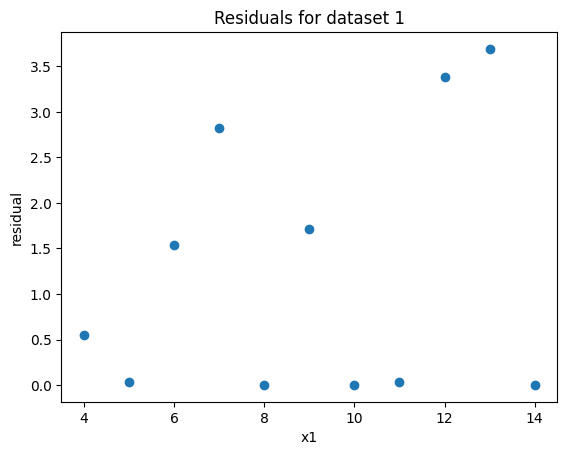

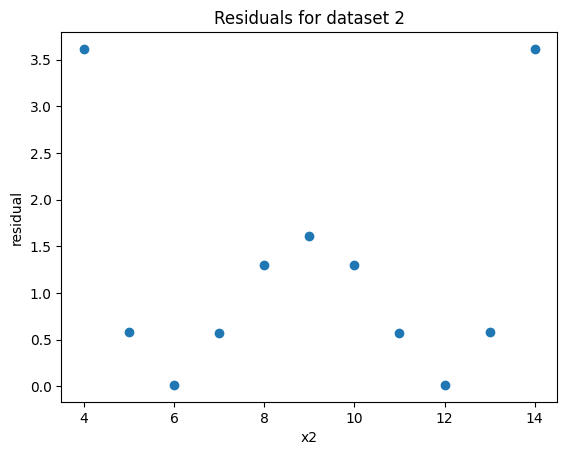

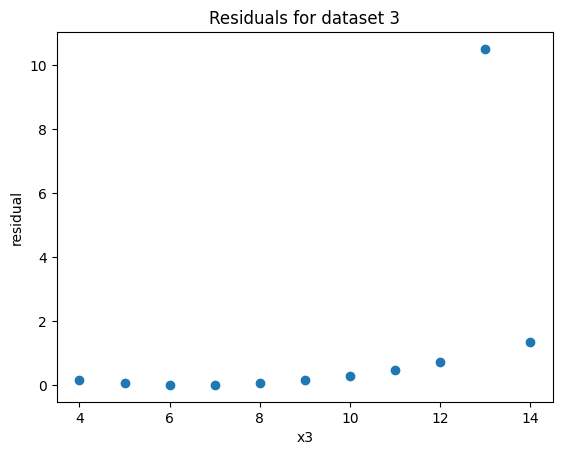

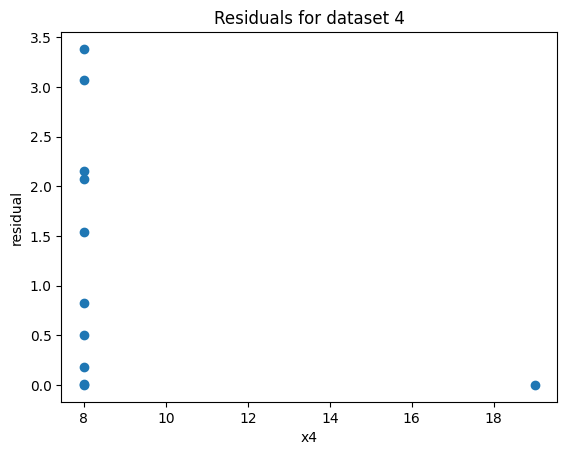

In [23]:
# Anscombe datasets
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])

x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

# calculate pearson co-efficient
r1 = pearson_coeff(x1, y1)
r2 = pearson_coeff(x2, y2)
r3 = pearson_coeff(x3, y3)
r4 = pearson_coeff(x4, y4)
print("Pearson co-efficient for dataset 1: ", r1)
print("Pearson co-efficient for dataset 2: ", r2)
print("Pearson co-efficient for dataset 3: ", r3)
print("Pearson co-efficient for dataset 4: ", r4)

# calculate co-efficient of multiple determination
print("Coefficient of multiple determination for dataset 1: ", r1 ** 2)
print("Coefficient of multiple determination for dataset 2: ", r2 ** 2)
print("Coefficient of multiple determination for dataset 3: ", r3 ** 2)
print("Coefficient of multiple determination for dataset 4: ", r4 ** 2)

# calculate residuals
residual1 = linear_regression_least_squared(x1, y1)["residual"]
residual2 = linear_regression_least_squared(x2, y2)["residual"]
residual3 = linear_regression_least_squared(x3, y3)["residual"]
residual4 = linear_regression_least_squared(x4, y4)["residual"]

# plot residuals
plt.scatter(x1, residual1)
plt.xlabel("x1")
plt.ylabel("residual")
plt.title("Residuals for dataset 1")
plt.show()

plt.scatter(x2, residual2)
plt.xlabel("x2")
plt.ylabel("residual")
plt.title("Residuals for dataset 2")
plt.show()

plt.scatter(x3, residual3)
plt.xlabel("x3")
plt.ylabel("residual")
plt.title("Residuals for dataset 3")
plt.show()

plt.scatter(x4, residual4)
plt.xlabel("x4")
plt.ylabel("residual")
plt.title("Residuals for dataset 4")
plt.show()
